In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pydataset
sns.set()

In [54]:
df = pd.read_csv('habermans-survival.csv')

In [55]:
df

,Age,Year,N-nodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [56]:
class kNN:
    def __init__(self, k, data):
        data.reset_index(inplace = True, drop=True)
        self.data = data
        self.k = k
        return
    
    def set_k(self, k):
        self.k = k
        return
    
    def set_data(self, data):
        self.data = data
        return
    
    def distance(self, x, xi):
        subtr = x - xi
        product = np.dot(subtr, subtr)
        return product ** 0.5
    
    def classify_xk(self, xk):
        X = np.array((self.data).drop(axis = 1, columns = ['Class']))
        y = self.data['Class']
        distances = np.zeros(len(self.data))

        for i, x in enumerate(X):
            distances[i] = self.distance(xk, x)
        index = np.argsort(distances)[: self.k]
        classes = y.loc[index]
        counts = np.bincount(classes)
        return np.argmax(counts)
    
    def Classify(self, X):
        classif = np.zeros(len(X))
        for i, x in enumerate(X):
            classif[i] = self.classify_xk(x)
        return classif
    
    def accuracy(self, Test):
        Test.reset_index(inplace = True, drop=True)
        X = np.array(Test.drop(axis = 1, columns = ['Class']))
        y = Test['Class']
        total = len(y)
        classes = self.Classify(X)
        coef = 0
        for i in range(total):
            if classes[i] == y.iloc[i]:
                coef += 1
        return coef/total

In [57]:
index = random.sample(range(len(df)), len(df))
train_index = index[:260]
test_index = index[260:]

Train = df.iloc[train_index]
Test = df.iloc[test_index]

In [58]:
model = kNN(15, Train)
model.accuracy(Test)

0.782608695652174

# sklearn

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
inpt = df.drop(axis = 1, columns = ['Class'])
outpt = df['Class']

In [61]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(inpt.loc[train_index], outpt.loc[train_index])
labels = knn.predict(inpt.loc[test_index])

In [62]:
right = 0
for i, y in enumerate(outpt.loc[test_index]):
    if labels[i] == y:
        right += 1
print('Accuracy: ', right/len(test_index))

Accuracy:  0.782608695652174


### Balance scale

In [63]:
data = pd.read_csv('balance-scale.csv')

In [64]:
data.head()

,Class,Left-weight,Left-distance,Right-weight,Right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [65]:
X = data.drop(axis = 1, columns = ['Class'])
y = data.Class

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [68]:
knn1 = KNeighborsClassifier(n_neighbors = 17)
knn1.fit(x_treino, y_treino)
labels = knn1.predict(x_teste)

In [69]:
# Accuracy
knn1.score(x_teste, y_teste)

0.8670212765957447

# KNN Regression

In [70]:
class kNNRegression:
    
    def __init__(self, k, data):
        data.reset_index(inplace = True, drop=True)
        self.data = data
        self.k = k
        return
    
    def set_k(self, k):
        self.k = k
        return
    
    def set_data(self, data):
        self.data = data
        return
    
    def distance(self, x, xi):
        subtr = x - xi
        product = np.dot(subtr, subtr)
        return product ** 0.5
    
    def predict_xk(self, xk):
        X = np.array((self.data).drop(axis = 1, columns = ['Value']))
        y = self.data['Value']
        distances = np.zeros(len(self.data))
        for i, x in enumerate(X):
            distances[i] = self.distance(xk, x)
        index = np.argsort(distances)[: self.k]
        mean = y.loc[index].mean()
        return mean
    
    def Predict(self, X):
        values = np.zeros(len(X))
        for i, x in enumerate(X):
            values[i] = self.predict_xk(x)
        return values

In [71]:
array = np.array([
    [2, 4, 1, 5, 2, 6, 3, 4, 5, 3],
    [50, 90, 38, 105, 48, 120, 65, 80, 100, 60],
    [250, 490, 138, 505, 248, 612, 365, 480, 500, 360]
])
array = array.T

In [72]:
houses = pd.DataFrame(array, columns = ["N_Rooms", "Area", "Value"])
houses

,N_Rooms,Area,Value
0,2,50,250
1,4,90,490
2,1,38,138
3,5,105,505
4,2,48,248
5,6,120,612
6,3,65,365
7,4,80,480
8,5,100,500
9,3,60,360


In [73]:
knn_r = kNNRegression(3, houses)

In [74]:
X = array[:,:2]
res = knn_r.Predict(X)

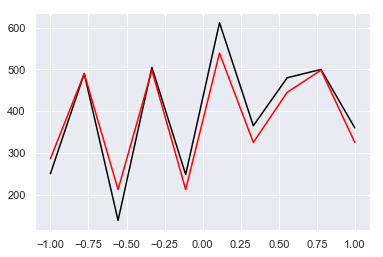

In [75]:
plt.plot(np.linspace(-1,1,10), houses.Value, label="Esperado", color="black")
plt.plot(np.linspace(-1,1,10), res, label="Estimado", color="red")

# sklearn

In [76]:
from sklearn.datasets import load_boston

In [77]:
boston = load_boston()

In [78]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [79]:
boston.data.shape

(506, 13)

In [80]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [82]:
k_nn = KNeighborsRegressor(n_neighbors = 9)
k_nn.fit(boston.data, boston.target)
print('target:', boston.target[12],'estimation:', k_nn.predict([boston.data[12]]))

target: 21.7 estimation: [23.11111111]


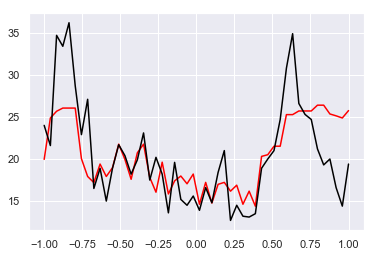

In [83]:
x, y = boston.data[:50], boston.target[:50]
y_ = k_nn.fit(x, y).predict(x)
plt.plot(np.linspace(-1,1,50), y_, label = "Estimation", color = "red")
plt.plot(np.linspace(-1,1,50), y, label = "Target", color = "black")


In [84]:
x_treino, x_teste, y_treino, y_teste = train_test_split(boston.data, boston.target, test_size = 0.3, random_state = 42)

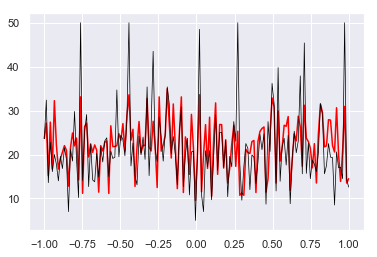

In [85]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(x_treino, y_treino)
y_ = knn.predict(x_teste)
plt.plot(np.linspace(-1,1,len(y_teste)), y_, label = "Estimation", color = "red")
plt.plot(np.linspace(-1,1,len(y_teste)), y_teste, label = "Target", color = "black", linewidth = 0.7)

# Mean Squared Error

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

## Diabetes dataset

In [88]:
from sklearn import datasets

In [90]:
diabetes = datasets.load_diabetes()

In [91]:
x, y = diabetes.data, diabetes.target

In [92]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

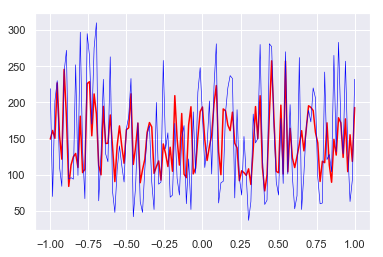

2978.11421286781

In [99]:
knn = KNeighborsRegressor(n_neighbors= 17)
knn.fit(x_treino, y_treino)
y_ = knn.predict(x_teste)
plt.plot(np.linspace(-1,1,len(y_teste)), y_, label = "Estimation", color = "red")
plt.plot(np.linspace(-1,1,len(y_teste)), y_teste, label = "Target", color = "blue", linewidth = 0.6)
plt.show()
mean_squared_error(y_teste, y_)